In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
y_data = pd.read_csv('../raw_data/ISIC_2019_Training_GroundTruth.csv')

In [5]:
y_data

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,ISIC_0073248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25328,ISIC_0073249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0073251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
def cancer(df):
    if 1 in (df['MEL'],df['BCC'],df['AK'],df['SCC']):
        return 1
    return 0

In [7]:
def category(df):
    if df['MEL']==1:
        return 'MEL'
    elif df['NV']==1:
        return 'NV'
    elif df['BCC']==1:
        return 'BCC'
    elif df['AK']==1:
        return 'AK'
    elif df['BKL']==1:
        return 'BKL'
    elif df['DF']==1:
        return 'DF'
    elif df['VASC']==1:
        return 'VASC'
    elif df['SCC']==1:
        return 'SCC'
    return 'UNK'

In [8]:
y_data['cancer'] = y_data.apply(cancer, axis=1)
y_data.head(10)

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,cancer
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,ISIC_0000006,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,ISIC_0000007,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,ISIC_0000008,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,ISIC_0000009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,ISIC_0000010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [9]:
y_data['category'] = y_data.apply(category, axis=1)

In [10]:
y_data = y_data.drop(columns=['MEL','NV','BCC','AK','BKL','DF','VASC','SCC','UNK'])
y_data

,image,cancer,category
0,ISIC_0000000,0,NV
1,ISIC_0000001,0,NV
2,ISIC_0000002,1,MEL
3,ISIC_0000003,0,NV
4,ISIC_0000004,1,MEL
...,...,...,...
25326,ISIC_0073247,1,BCC
25327,ISIC_0073248,0,BKL
25328,ISIC_0073249,1,MEL
25329,ISIC_0073251,0,NV


In [14]:
def get_image(df):
    return np.asarray(Image.open((f"../raw_data/{df['category']}/{df['image']}.jpg")))

In [15]:
y_data.iloc[:2]

,image,cancer,category
0,ISIC_0000000,0,NV
1,ISIC_0000001,0,NV


In [16]:
image = y_data.iloc[:2].apply(get_image, axis=1)
image

0    [[[249, 255, 255], [231, 241, 251], [241, 255,...
1    [[[255, 254, 255], [229, 228, 236], [255, 254,...
dtype: object

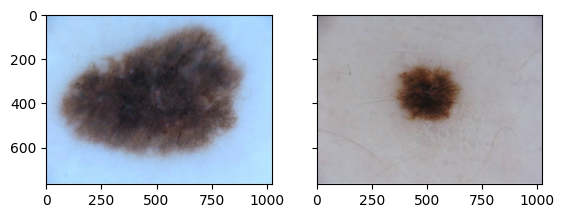

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(image[0])
ax2.imshow(image[1])

In [ ]:
# Plot histogram of the different classes
